##***Introducción***##

En este proyecto  se pretende utilizar el algoritmo de descenso por gradiente para manifiestar es para practicar regresión lineal.


#Importando librerias necesarias#

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Cargando los Datos  y Renombrando Columnas#

Cargando los datos a un array con Numpy

In [2]:
data_array = np.load("/content/proyecto_training_data.npy")
#Recordar cambiar esto.

Cargando los datos a un DataFrame con Pandas para mayor facilidad en la manipulación de datos.

In [3]:
data= pd.DataFrame(data_array)
data.head()


,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


Renombrando las columnas para mejor entendimiento de los tados:

In [4]:
data.columns = ["Sale Price","Overall-Quality", "1stFlrSF", "TotRmsAbvGrd","YearBuilt","LotFrontage"]
data.head()


,Sale Price,Overall-Quality,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


#Dividiendo los datos de entrenamiento y de testing.

El set es dividido en 2 partes. El data_train representa los datos a entrenar y el data_test representa los datos para validar nuestro algoritmo.

In [5]:
n=len(data)   #Número de registros en el dataSet
data['Train'] = np.random.uniform(0,1,n) <=0.8 #Create a column to assign a number randomly to 80% of data.
data_train, data_test=data[data['Train'] ==True], data[data['Train'] ==False]   #dividiendo el dataSet.
print(f"Registros de entrenamiento: {len(data_train)} \nRegistros para Testeo: {len(data_test)} \n")
del data['Train']
del data_train['Train']
del data_test['Train']



Registros de entrenamiento: 1186 
Registros para Testeo: 274 



#Analisis Exploratorio de Datos

Los números para describir los datos son presentados en una tabla usando pandas. 

In [8]:
data_train.head()

,Sale Price,Overall-Quality,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


Estadisticos de cada columna:

In [9]:
AED = {"Media":data_train.mean(), "Valor Máximo": data_train.max(), "Valor Minimo": data_train.min(), "Rango": data_train.max()-data_train.min(), "Desviación Standar": data_train.std()}
pd.DataFrame(AED)

,Media,Valor Máximo,Valor Minimo,Rango,Desviación Standar
Sale Price,181349.784148,755000.0,34900.0,720100.0,80717.984708
Overall-Quality,6.113828,10.0,1.0,9.0,1.391242
1stFlrSF,1163.156830,3228.0,334.0,2894.0,378.148303
TotRmsAbvGrd,6.553963,14.0,2.0,12.0,1.640995
YearBuilt,1971.395447,2010.0,1872.0,138.0,30.219975
LotFrontage,70.336049,313.0,21.0,292.0,23.739563


#Histogramas de Cada Variable#

Acá se presentan todos los histogramas de cada variable.

In [17]:
data.columns

Index(['Sale Price', 'Overall-Quality', '1stFlrSF', 'TotRmsAbvGrd',
       'YearBuilt', 'LotFrontage'],
      dtype='object')

SALE PRICE


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


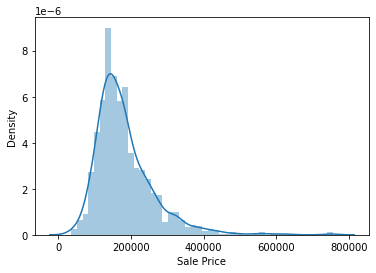

---------------------
OVERALL-QUALITY


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


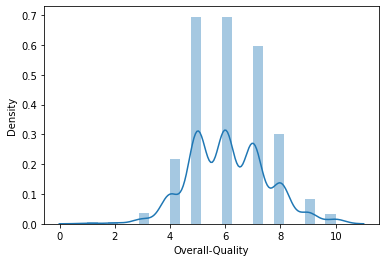

---------------------
1STFLRSF


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


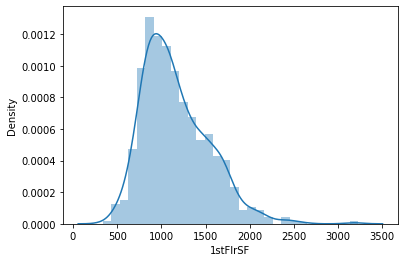

---------------------
TOTRMSABVGRD


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


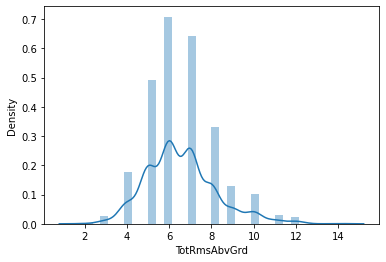

---------------------
YEARBUILT


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


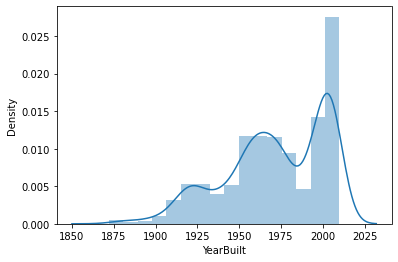

---------------------
LOTFRONTAGE


/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


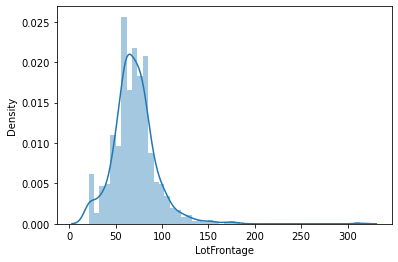

---------------------


In [22]:
   for colname in data_train.columns:
        print(colname.upper())
        sns.distplot(data_train[colname])
        plt.show()
        print("---------------------")

#Coeficientes de Correlación y ScatterPlots

**-Coeficientes de Correlación entre variables**

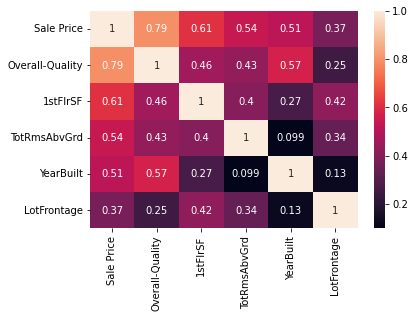

In [23]:
sns.heatmap(data_train.corr(),annot=True)
plt.show()

**-Gráficas con MatplotLib**

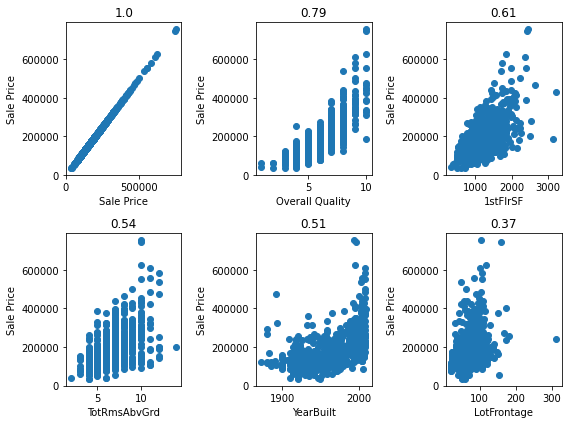

In [24]:
fig, axes =plt.subplots(2,3)
y=data_train['Sale Price']

#Tamaño
fig.set_figheight(6)
fig.set_figwidth(8)

#Graficas
axes[0,0].scatter(y,y)
axes[0,1].scatter(data_train['Overall-Quality'],y)
axes[0,2].scatter(data_train["1stFlrSF"],y)
axes[1,0].scatter(data_train['TotRmsAbvGrd'],y)
axes[1,1].scatter(data_train['YearBuilt'],y)
axes[1,2].scatter(data_train['LotFrontage'],y)

#Correlaciones
axes[0,0].set_title(round(y.corr(y),2))
axes[0,1].set_title(round(y.corr(data_train['Overall-Quality']),2))
axes[0,2].set_title(round(y.corr(data_train["1stFlrSF"]),2))
axes[1,0].set_title(round(y.corr(data_train['TotRmsAbvGrd']),2))
axes[1,1].set_title(round(y.corr(data_train['YearBuilt']),2))
axes[1,2].set_title(round(y.corr(data_train['LotFrontage']),2))

#Etiquetas en Y
for i in range(2):
  for j in range(3):
    axes[i,j].set_ylabel("Sale Price")


#Etiquetas en X
axes[0,0].set_xlabel("Sale Price")
axes[0,1].set_xlabel("Overall Quality")
axes[0,2].set_xlabel("1stFlrSF")
axes[1,0].set_xlabel('TotRmsAbvGrd')
axes[1,1].set_xlabel('YearBuilt')
axes[1,2].set_xlabel('LotFrontage')

fig.tight_layout()
plt.show()

En la gráfica anterior se puede observar que existe mayor correlación para el precio de ventas por parte de las variables **Overall Quality y  First Floor square feet (1stFlrSF:)**  Por lo que se tomarán estas dos variables para nuestros modelos de entrenamiento.

##Clase MyRegresionModel con Descenso de Gradiente + *Visualización*

Acá entrenaremos el modelo con el algoritmo anterior

In [815]:
class MyRegresionModel:
    def __init__(self, alpha=0.01, epochs=100):
        self.alpha = alpha
        self.epochs = epochs

    def descenso_gradientes(self, x, y):  #Función del descenso de gradiente
        self.x=x
        self.y=y
        #Preparar los datos en vector form
        
        vect1 = np.ones_like(x).reshape(-1, 1)
        x = np.reshape(x, (-1, 1))
        x = np.hstack([x, vect1]) #Agregar columna de 1's a x.
        
        # Parámetros de Entrenamiento
        
        n = len(y)
        
        
        self.beta = np.zeros((x.shape[1], 1))
        self.error = np.zeros((self.epochs, 1))
        self.betas = np.zeros((self.epochs,2))
        # Comenzar entrenamiento
        for i in range(self.epochs):
            y_pred = np.matmul(x, self.beta)
            self.error[i] = (1/(2*n)) * np.sum(np.square(y-y_pred))
            gradiente_error = (1/n) * x.T.dot(y_pred-y)
            self.beta = self.beta - self.alpha * gradiente_error

            b0 = self.beta[0].mean()
            b1 = self.beta[1].mean()

            self.betas[i] = np.array([b0,b1])




        return self.betas, self.error    #Retornar los arrays beta y el errror de cada iteración

    def fit(self, x,y):
      self.modelo, self.error = self.descenso_gradientes( x, y)
      modelo_final = self.modelo[self.epochs-1]

      return self.modelo


    def visualizar_error(self):
        
        plt.plot(range(len(self.error)), self.error)
        plt.title("Error en el tiempo")
        plt.xlabel("# Iteración")
        plt.ylabel("Error")
        plt.show()

    def visualizar_modelo(self,n):
      k = np.arange(0,self.epochs,n)
      print(k)
      for i in k:
         
         b0,b1 = self.modelo[i]

         print("Modelo de Regresión-- > Iteración ", i+1)
         print(f"b0: {b0}")
         print(f"b1: {b1}")
         

         y_model = b0+self.x*b1

 
         my_model_data =  np.hstack([self.x.T, y_model.T])
         y_original =np.array([self.y]) 
         o_data = np.hstack([self.x.T,y_original .T])

       

         #Paso todo a pandas para graficar con seaborn

         midata=pd.DataFrame(my_model_data,columns= ["x","y"])
         original_data= pd.DataFrame(o_data,columns= ["x","y"])

         sns.lmplot(x="x",y="y",data=midata)
         sns.lmplot(x="x",y="y",data=original_data)

         print("--------------------------------")

         plt.title("Modelo de Regresión")
         plt.xlabel("x")
         plt.ylabel("Sales Price")
         plt.show()
         


##Entrenando el Modelo Lineal - MyRegresionModel

###Sales Price vs Overall Quality Linear Model

Primero, obtendremos las variables del DataFrame que usaremos para la variable **Overral-Quality**

In [816]:
y_train_sales=np.array(data_train['Sale Price'])
x_train_overrall_quality= np.array([data_train['Overall-Quality']])

(1, 1186)

Definimos nuestra instancia del modelo:

In [817]:
reg1 = MyRegresionModel(alpha=0.01, epochs=10) 


Entrenamos el modelo y obtenemos nuestros resultados finales:

In [818]:
modelo = reg1.fit(x_train_overrall_quality,y_train_sales)
betasFinales = pd.DataFrame(modelo, columns =["bo", "b1"])
betasFinales.tail(2)   #Las últimas dos interaciones nos dan la respuesta final para nuestro modelo.

,bo,b1
8,27183.204292,5015.051823
9,27277.523381,5116.464793


Visualizamos el error en el tiempo:

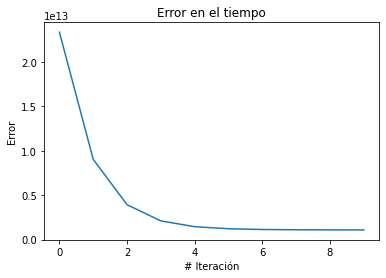

In [819]:
reg1.visualizar_error()

**Gráficamos nuestro modelo**

[0 2 4 6 8]
Modelo de Regresión-- > Iteración  1
b0: 11087.413868971615
b1: 1813.4978414839802
--------------------------------


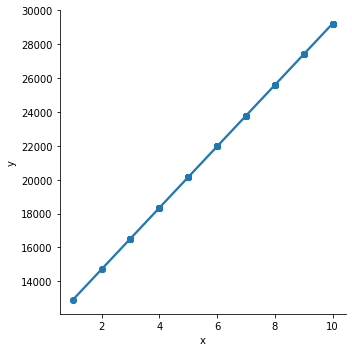

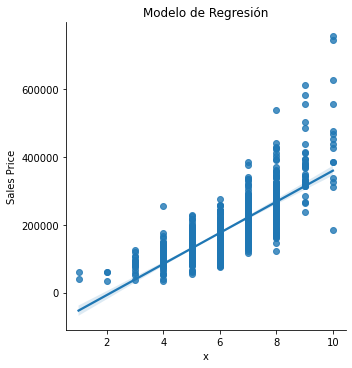

Modelo de Regresión-- > Iteración  3
b0: 21652.992360831675
b1: 3632.718992462326
--------------------------------


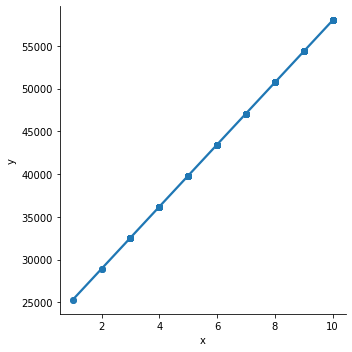

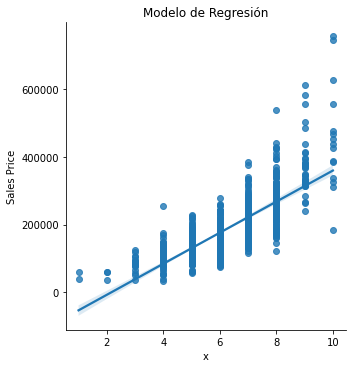

Modelo de Regresión-- > Iteración  5
b0: 25406.1078874361
b1: 4391.020288492561
--------------------------------


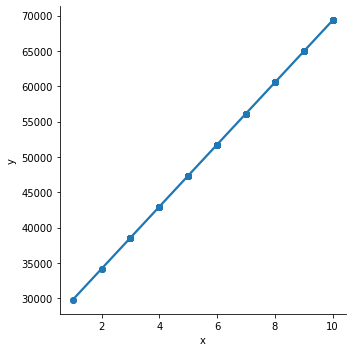

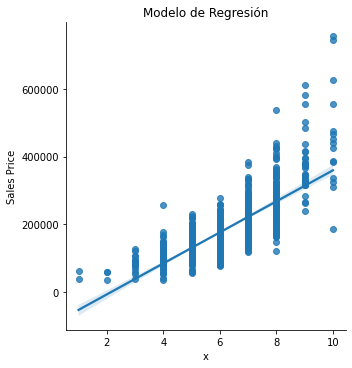

Modelo de Regresión-- > Iteración  7
b0: 26728.35144667234
b1: 4770.64917570187
--------------------------------


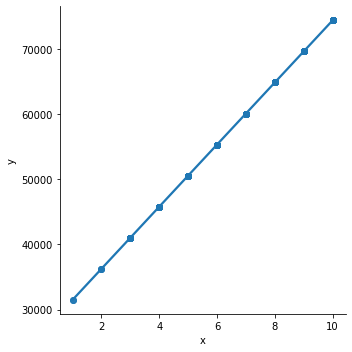

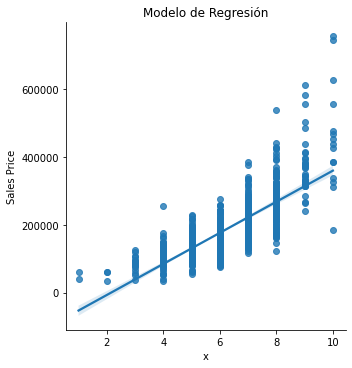

Modelo de Regresión-- > Iteración  9
b0: 27183.20429233682
b1: 5015.051823478054
--------------------------------


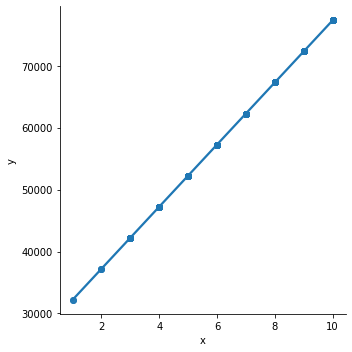

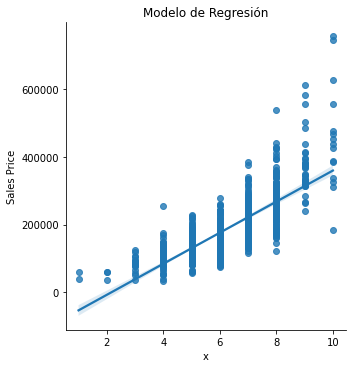

In [820]:
reg1.visualizar_modelo(n=2)

###Sales Price vs First Floor square feet (1stFlrSF) linear Model

Especificamos los datos para el entrenamiento de este modelo:

In [821]:
y_train_sales=np.array(data_train['Sale Price'])
x_train_1stFlrSF= np.array([data_train['1stFlrSF']])

array([[ 856., 1262.,  920., ..., 1188., 1078., 1256.]])

Declaramos la instancia para nuestro modelo:

In [822]:
reg2 = MyRegresionModel(alpha=0.01, epochs=50)  #Definimos nuestra instancia del modelo.

Entrenamos el modelo

In [823]:
modelo2 = reg2.fit(x_train_overrall_quality,y_train_sales)
betasFinales2 = pd.DataFrame(modelo2, columns =["bo", "b1"])
betasFinales2.tail(2)   #Las últimas dos interaciones nos dan la respuesta final para nuestro modelo.

,bo,b1
48,26927.730223,8412.049056
49,26914.796795,8495.111299


Visualización del error en cada iteración

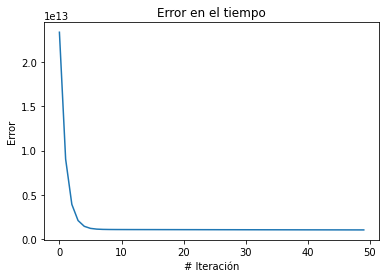

In [824]:
reg2.visualizar_error()

Visualizamos nuestros modelo:

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48]
Modelo de Regresión-- > Iteración  1
b0: 11087.413868971615
b1: 1813.4978414839802
--------------------------------


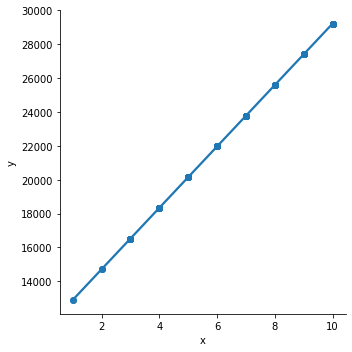

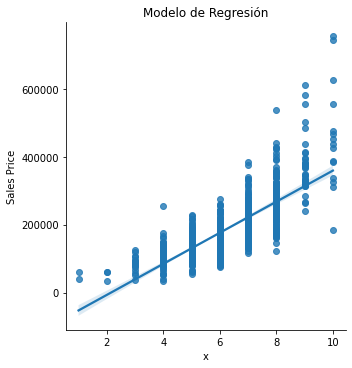

Modelo de Regresión-- > Iteración  3
b0: 21652.992360831675
b1: 3632.718992462326
--------------------------------


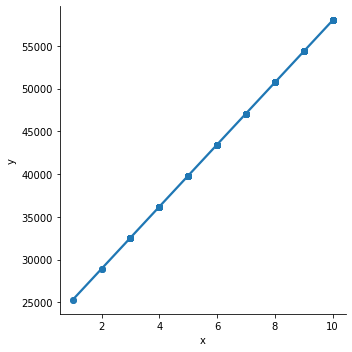

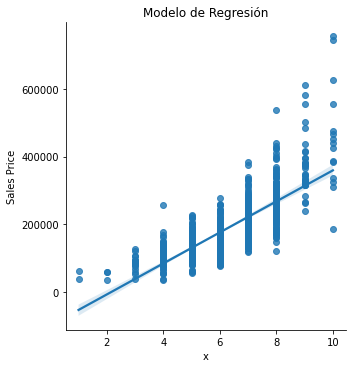

Modelo de Regresión-- > Iteración  5
b0: 25406.1078874361
b1: 4391.020288492561
--------------------------------


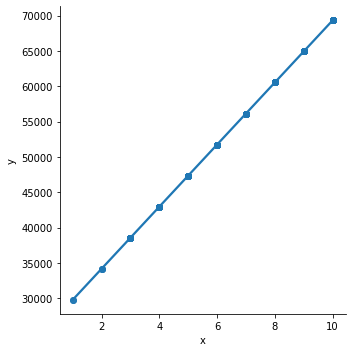

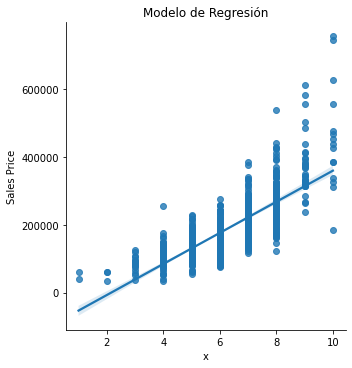

Modelo de Regresión-- > Iteración  7
b0: 26728.35144667234
b1: 4770.64917570187
--------------------------------


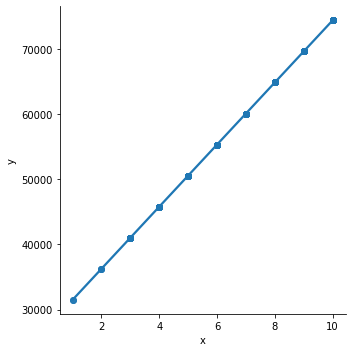

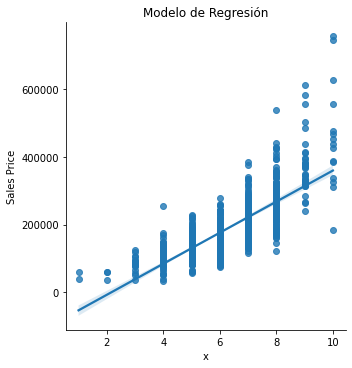

Modelo de Regresión-- > Iteración  9
b0: 27183.20429233682
b1: 5015.051823478054
--------------------------------


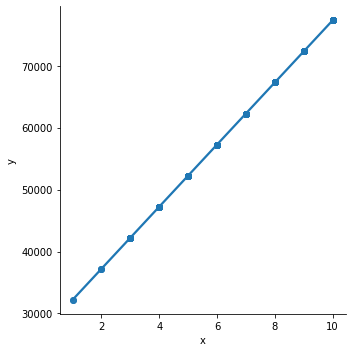

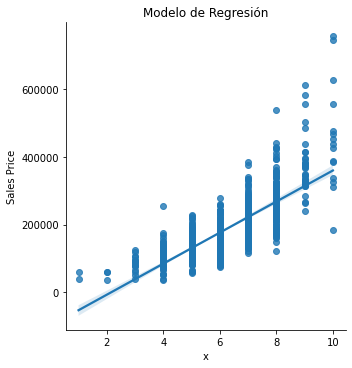

Modelo de Regresión-- > Iteración  11
b0: 27328.562765745595
b1: 5211.097126434379
--------------------------------


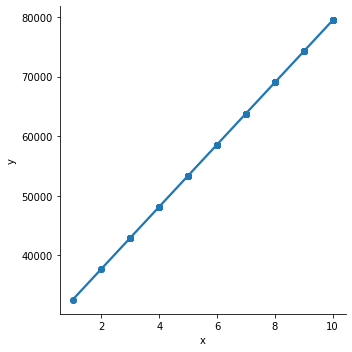

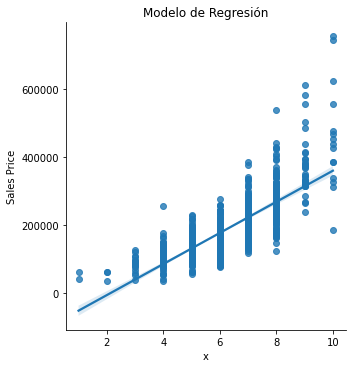

Modelo de Regresión-- > Iteración  13
b0: 27363.50076764039
b1: 5389.782576107898
--------------------------------


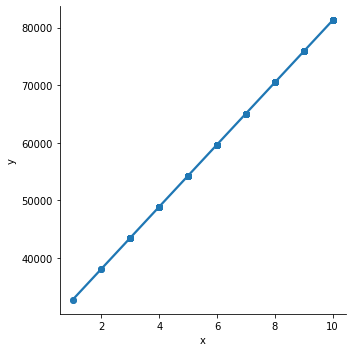

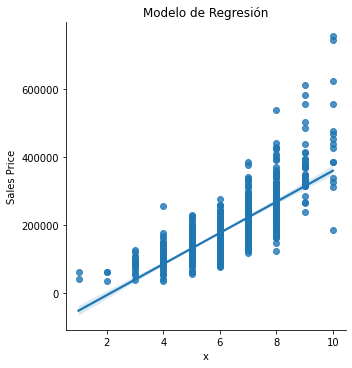

Modelo de Regresión-- > Iteración  15
b0: 27359.05373850761
b1: 5562.169094722442
--------------------------------


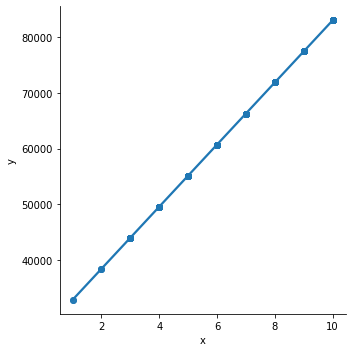

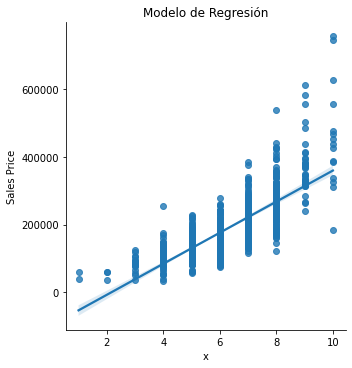

Modelo de Regresión-- > Iteración  17
b0: 27340.56920902828
b1: 5732.203646778231
--------------------------------


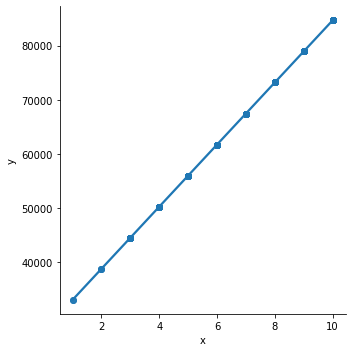

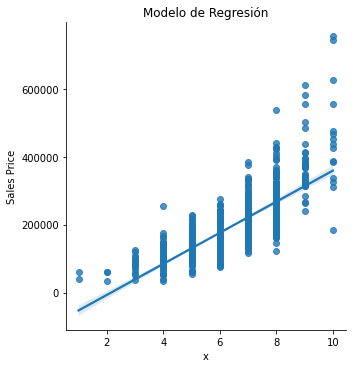

Modelo de Regresión-- > Iteración  19
b0: 27317.09191229445
b1: 5901.294726142319
--------------------------------


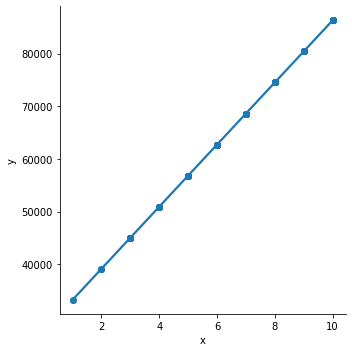

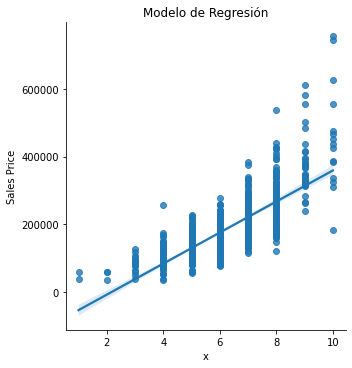

Modelo de Regresión-- > Iteración  21
b0: 27291.84926101912
b1: 6069.945025179164
--------------------------------


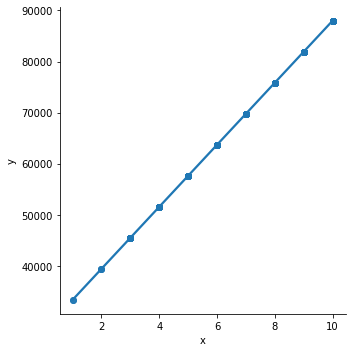

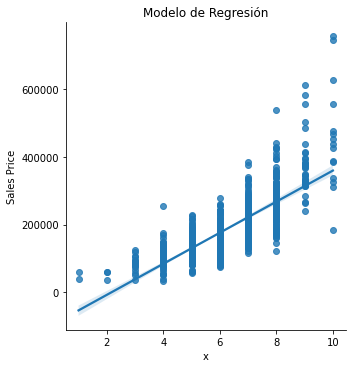

Modelo de Regresión-- > Iteración  23
b0: 27265.992875950684
b1: 6238.334019388617
--------------------------------


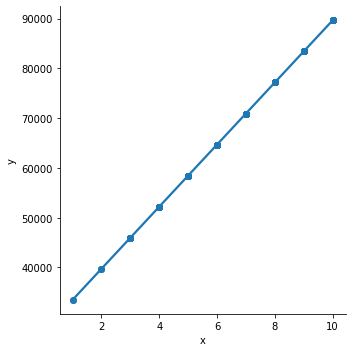

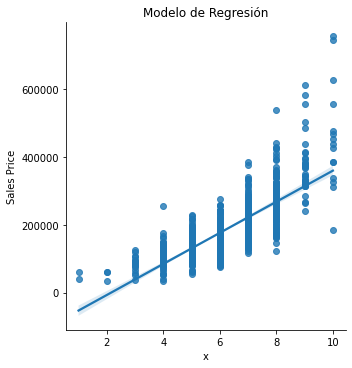

Modelo de Regresión-- > Iteración  25
b0: 27239.933673880434
b1: 6406.525850836892
--------------------------------


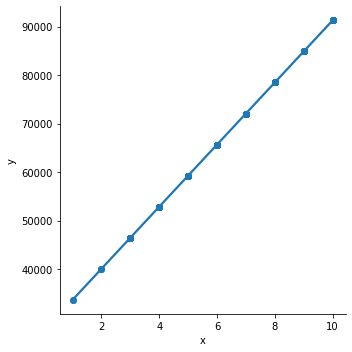

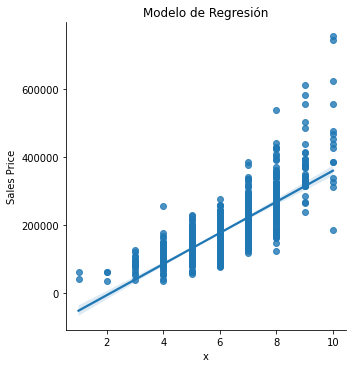

Modelo de Regresión-- > Iteración  27
b0: 27213.81826653373
b1: 6574.5435071137335
--------------------------------


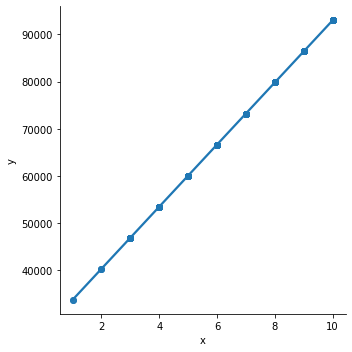

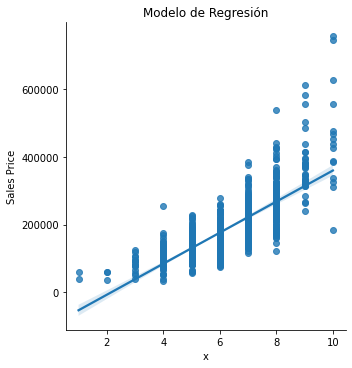

Modelo de Regresión-- > Iteración  29
b0: 27187.69895378554
b1: 6742.395290578549
--------------------------------


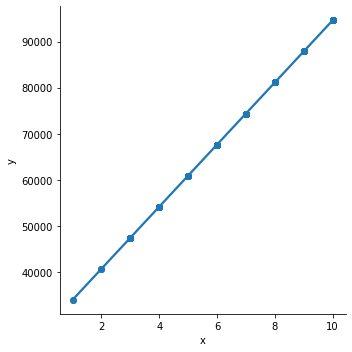

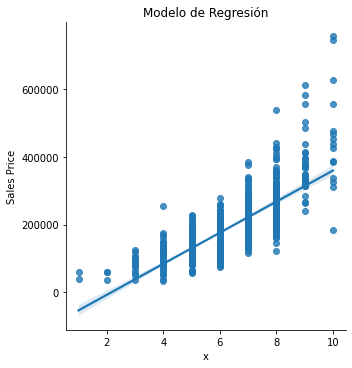

Modelo de Regresión-- > Iteración  31
b0: 27161.594382267904
b1: 6910.084263370427
--------------------------------


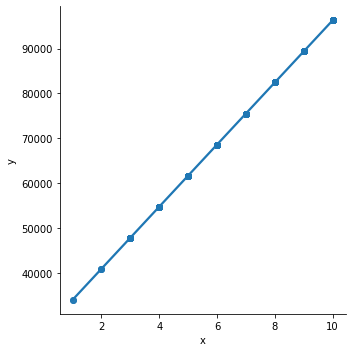

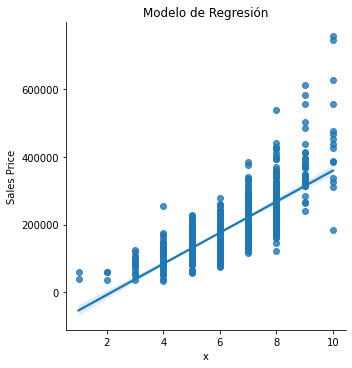

Modelo de Regresión-- > Iteración  33
b0: 27135.51119015528
b1: 7077.611617667192
--------------------------------


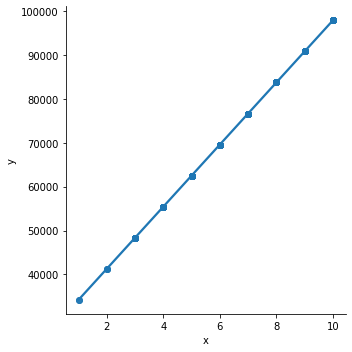

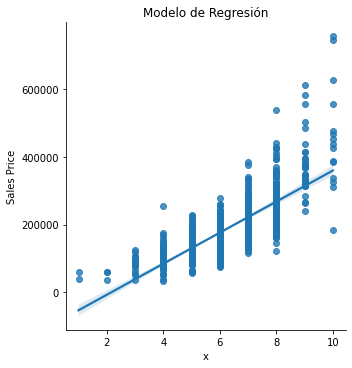

Modelo de Regresión-- > Iteración  35
b0: 27109.451730664117
b1: 7244.9778782936
--------------------------------


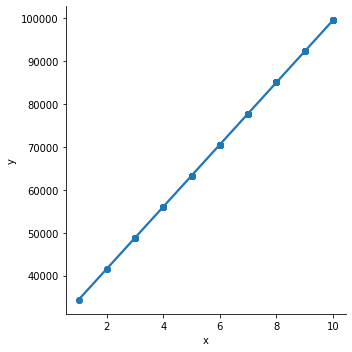

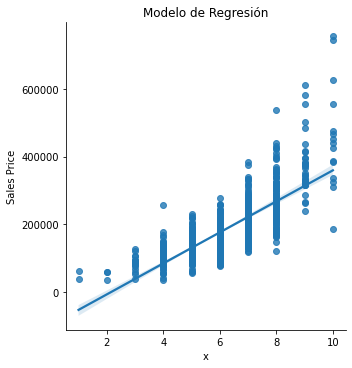

Modelo de Regresión-- > Iteración  37
b0: 27083.416828026013
b1: 7412.183331847615
--------------------------------


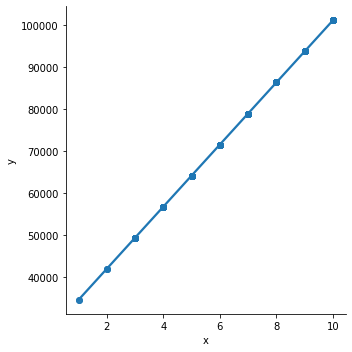

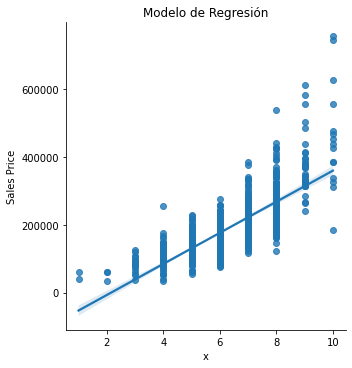

Modelo de Regresión-- > Iteración  39
b0: 27057.406760900365
b1: 7579.228179825444
--------------------------------


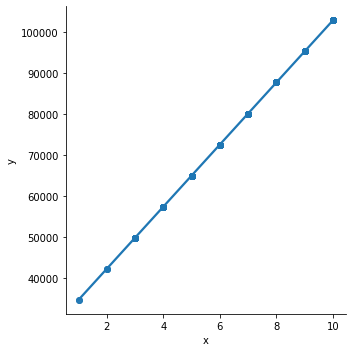

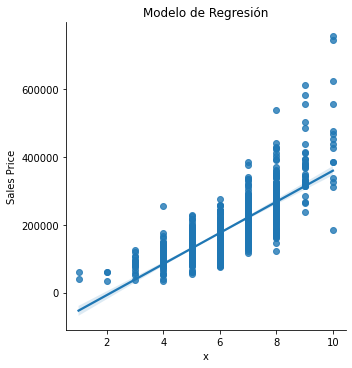

Modelo de Regresión-- > Iteración  41
b0: 27031.42161328512
b1: 7746.112593261178
--------------------------------


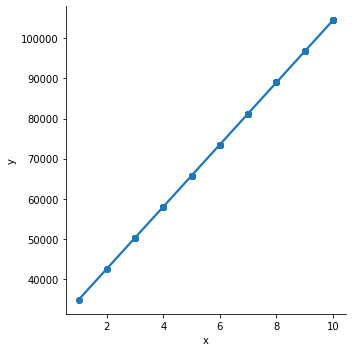

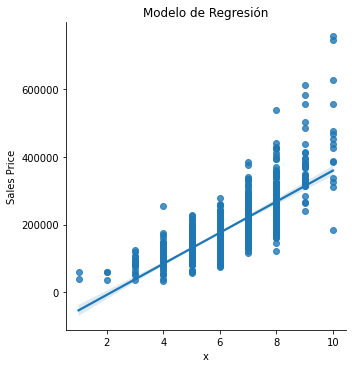

Modelo de Regresión-- > Iteración  43
b0: 27005.46139973209
b1: 7912.836732223913
--------------------------------


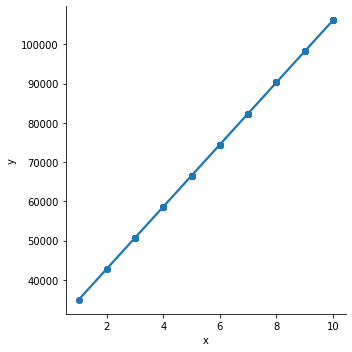

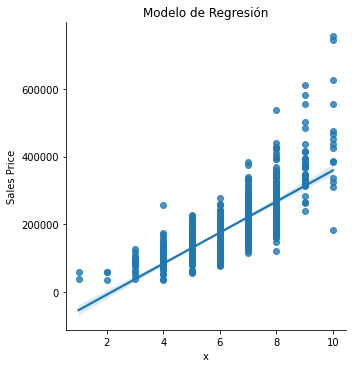

Modelo de Regresión-- > Iteración  45
b0: 26979.52611002746
b1: 8079.4007527749945
--------------------------------


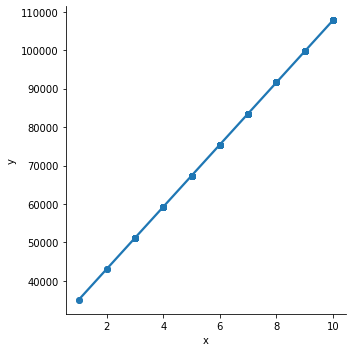

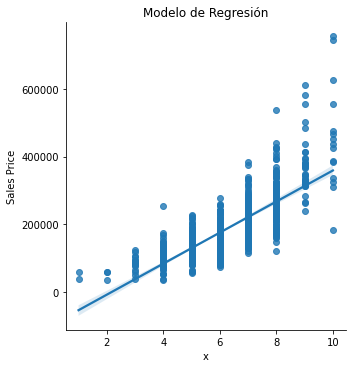

Modelo de Regresión-- > Iteración  47
b0: 26953.6157251351
b1: 8245.804809450667
--------------------------------


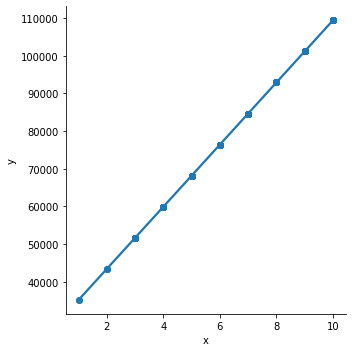

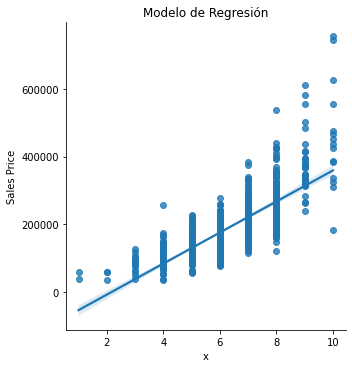

Modelo de Regresión-- > Iteración  49
b0: 26927.730222885602
b1: 8412.049056148038
--------------------------------


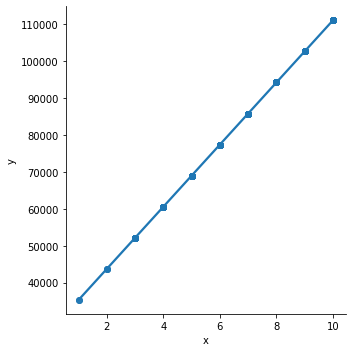

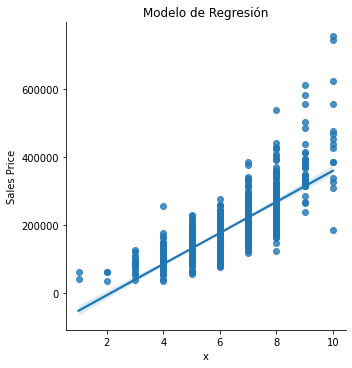

In [825]:
reg2.visualizar_modelo(n=2)